In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
season = ["2010-2011","2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", "2020-2021", "2021-2022", "2022-2023", "2023-2024"]
headers = {'Accept': '/', 'Connection': 'keep-alive', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/70.0.3538.110 Safari/537.36', 'Accept-Language':'en-US;q=0.5,en;q=0.3', 'Cache-Control': 'max-age=0', 'Upgrade-Insecure-Requests': '1'}

#### Websites we have taken data from:

In [4]:
url_ranking = "https://www.eurosport.com/football/premier-league/2012-2013/standings.shtml"
url_value = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2023'


#### Function that gets a table from a url

In [5]:
def get_table(headers, url, table_class, season):
    p = requests.get(url, headers = headers) 
    print(p.status_code)
    page = p.content
    soup = BeautifulSoup(page,"html.parser")
    rows = soup.find('table', {'class': table_class}).find('tbody').find_all('tr')
    data = []
    for row in rows:
        td = [cell.get_text(strip=True) for cell in row]
        td = [val for val in td if val]
        data.append(td + [season])
    df = pd.DataFrame(data)
    return df

#### Retrive the premier league table for each season since season 2010-2011

In [6]:
table_class_ranking = 'w-full table-auto overflow-hidden border-b border-br-2-80'
full_table = get_table(headers, f"https://www.eurosport.com/football/premier-league/2010-2011/standings.shtml", table_class_ranking, '2010-2011')
for i in season[1:]:
    print(i)
    df = get_table(headers, f"https://www.eurosport.com/football/premier-league/{i}/standings.shtml", table_class_ranking,i)
    full_table = pd.concat([full_table,df])

full_table

200
2011-2012
200
2012-2013
200
2013-2014
200
2014-2015
200
2015-2016
200
2016-2017
200
2017-2018
200
2018-2019
200
2019-2020
200
2020-2021
200
2021-2022
200
2022-2023
200
2023-2024
200


,0,1,2,3,4,5,6,7,8,9,10
0,1,Manchester UnitedMUN,38,23,11,4,78,37,41,80,2010-2011
1,2,ChelseaCHE,38,21,8,9,69,33,36,71,2010-2011
2,3,Manchester CityMCI,38,21,8,9,60,33,27,71,2010-2011
3,4,ArsenalARS,38,19,11,8,72,43,29,68,2010-2011
4,5,Tottenham HotspurTOT,38,16,14,8,55,46,9,62,2010-2011
...,...,...,...,...,...,...,...,...,...,...,...
15,16,BrentfordBRE,38,10,9,19,56,65,-9,39,2023-2024
16,17,Nottingham ForestNOT,38,9,9,20,49,67,-18,32,2023-2024
17,18,Luton TownLUT,38,6,8,24,52,85,-33,26,2023-2024
18,19,BurnleyBUR,38,5,9,24,41,78,-37,24,2023-2024


#### Retrive table for market value of premier league teams for each season

In [7]:
# saison_id=2023 means season 23/24
table_class_value = 'items'
market_table = get_table(headers, 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2010', table_class_value, '2010-2011')
for i in season[1:]:
    print(i)
    df = get_table(headers, f'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id={i[:4]}', 'items',i)
    market_table = pd.concat([market_table,df])
    
market_table

200
2011-2012
200
2012-2013
200
2013-2014
200
2014-2015
200
2015-2016
200
2016-2017
200
2017-2018
200
2018-2019
200
2019-2020
200
2020-2021
200
2021-2022
200
2022-2023
200
2023-2024
200


,0,1,2,3,4,5,6
0,Chelsea FC,33,25.9,23,€12.85m,€424.10m,2010-2011
1,Manchester City,45,24.9,28,€8.98m,€404.18m,2010-2011
2,Manchester United,43,25.7,29,€9.02m,€388.00m,2010-2011
3,Liverpool FC,42,24.9,25,€8.08m,€339.20m,2010-2011
4,Arsenal FC,34,24.8,27,€9.53m,€324.00m,2010-2011
...,...,...,...,...,...,...,...
15,Everton FC,34,26.8,16,€11.52m,€391.75m,2023-2024
16,Fulham FC,35,26.9,31,€10.98m,€384.35m,2023-2024
17,Burnley FC,39,25.3,30,€7.01m,€273.48m,2023-2024
18,Sheffield United,45,24.7,26,€3.39m,€152.45m,2023-2024


#### Data cleaning and merging the tables

In [8]:
#removing FC
def clean_market_club_name(club_name):
    return club_name.replace("FC", "").strip()

#removing MUN, CUH etc..
def clean_full_club_name(club_name):
    return club_name[:-3].strip()

#applying above functions
full_table[1] = full_table[1].apply(clean_full_club_name)
market_table[0] = market_table[0].apply(clean_market_club_name)

#renaming  columns
full_table.columns = ['Position', 'Club', 'P', 'W', 'D', 'L', 'GF', 'GA', '(+/-)', 'PTS', 'Season']
market_table.columns = ['Club', '#Players', 'avg_age', 'Foreigners', 'Market Value', 'Total Market Value(Million €)', 'Season']

print(full_table)
print(market_table)


   Position               Club   P   W   D   L  GF   GA (+/-) PTS     Season
0         1  Manchester United  38  23  11   4  78   37    41  80  2010-2011
1         2            Chelsea  38  21   8   9  69   33    36  71  2010-2011
2         3    Manchester City  38  21   8   9  60   33    27  71  2010-2011
3         4            Arsenal  38  19  11   8  72   43    29  68  2010-2011
4         5  Tottenham Hotspur  38  16  14   8  55   46     9  62  2010-2011
..      ...                ...  ..  ..  ..  ..  ..  ...   ...  ..        ...
15       16          Brentford  38  10   9  19  56   65    -9  39  2023-2024
16       17  Nottingham Forest  38   9   9  20  49   67   -18  32  2023-2024
17       18         Luton Town  38   6   8  24  52   85   -33  26  2023-2024
18       19            Burnley  38   5   9  24  41   78   -37  24  2023-2024
19       20   Sheffield United  38   3   7  28  35  104   -69  16  2023-2024

[280 rows x 11 columns]
                 Club #Players avg_age Foreigners M

In [9]:
df = pd.merge(full_table, market_table, how='left', left_on = ['Club','Season'], right_on=['Club', 'Season'])
df = df.drop('Market Value', axis = 1)
print(df.shape)
df = df.dropna()

(280, 15)


In [10]:
print(df.shape)

(266, 15)


In [12]:
df.dtypes

Position                         object
Club                             object
P                                object
W                                object
D                                object
L                                object
GF                               object
GA                               object
(+/-)                            object
PTS                              object
Season                           object
#Players                         object
avg_age                          object
Foreigners                       object
Total Market Value(Million €)    object
dtype: object

In [13]:
# Change type of the columns in the dataframe
df['PTS'] = df['PTS'].astype(int)
df['#Players'] = df['#Players'].astype(int)
df['avg_age'] = df['avg_age'].astype(float)
df['Position'] = df['Position'].astype(int)

# Change the "Total MArket Value" column to numeric values
df['Total Market Value(Million €)'] = df['Total Market Value(Million €)'].apply(lambda x: float(x[1:-1]) if x[-1] == 'm' else float(x[1:-2])*1000)

In [14]:
df.dtypes

Position                           int64
Club                              object
P                                 object
W                                 object
D                                 object
L                                 object
GF                                object
GA                                object
(+/-)                             object
PTS                                int64
Season                            object
#Players                           int64
avg_age                          float64
Foreigners                        object
Total Market Value(Million €)    float64
dtype: object

In [33]:
df.head()

,Position,Club,P,W,D,L,GF,GA,(+/-),PTS,Season,#Players,avg_age,Foreigners,Total Market Value(Million €)
0,1,Manchester United,38,23,11,4,78,37,41,80,2010-2011,43,25.7,29,388.00
1,2,Chelsea,38,21,8,9,69,33,36,71,2010-2011,33,25.9,23,424.10
2,3,Manchester City,38,21,8,9,60,33,27,71,2010-2011,45,24.9,28,404.18
3,4,Arsenal,38,19,11,8,72,43,29,68,2010-2011,34,24.8,27,324.00
4,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,2010-2011,38,26.3,22,307.08


In [34]:
data_2024 = df[df['Season'] == '2023-2024']

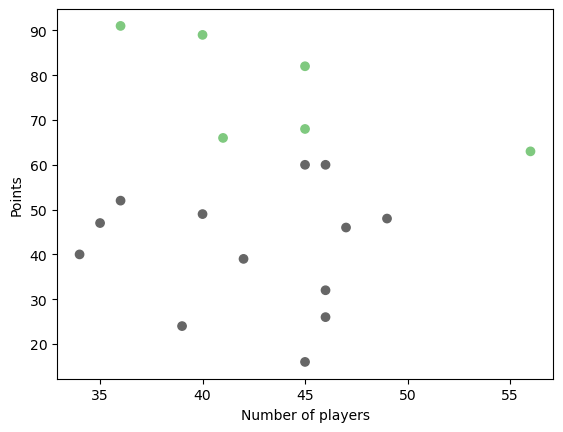

In [31]:
plt.scatter(data_2024['#Players'], data_2024['PTS'], c = data_2024['PTS']>60, cmap='Accent_r')

plt.ylabel('Points')
plt.xlabel('Number of players')
plt.show()

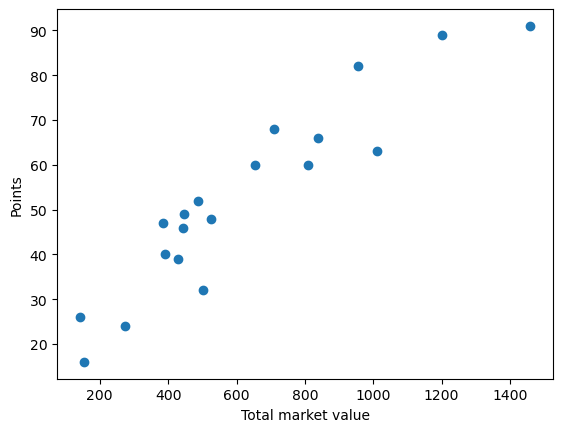

In [35]:
plt.scatter(data_2024['Total Market Value(Million €)'], data_2024['PTS'])

plt.ylabel('Points')
plt.xlabel('Total market value')
plt.show()

In [18]:
liverpool = df[df['Club'] == 'Liverpool'] 

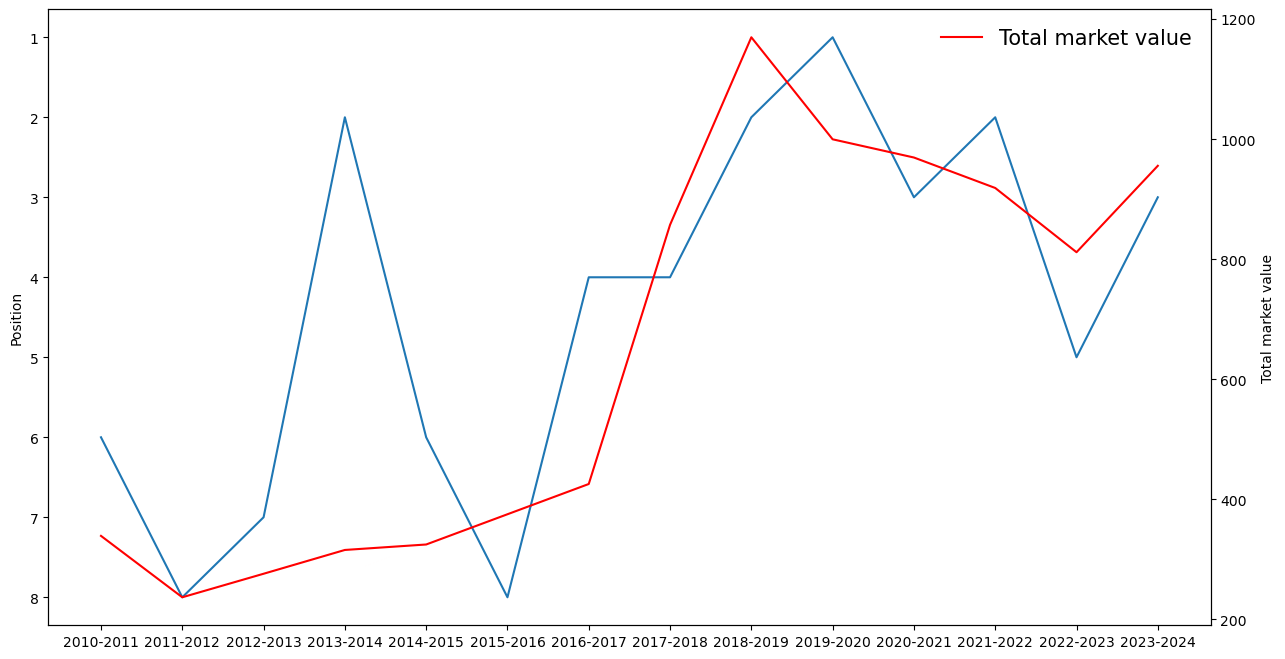

In [19]:
graph,plot1 = plt.subplots(1, 1, figsize = (15,8))
plot1.plot(liverpool['Season'], liverpool['Position'], label = 'Table position')
plot1.invert_yaxis()

ax2 = plot1.twinx()
ax2.plot(liverpool['Season'], liverpool['Total Market Value(Million €)'], color = 'red', label = 'Total market value')

plot1.set_ylabel('Position')
ax2.set_ylabel('Total market value')



plt.legend(frameon=False, prop={'size':15})
plt.show()